В рамках данного кейса нам необходимо помочь HR-аналитики компании «Работа с заботой» оптимизировать управление персоналом.Бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. Сделать это можно с помощью предсказания удовлетворенностью сотрудников работой и предсказанием их желания уволится с помощью МО.

Будем двигаться на основе следующего плана:

<div>1.построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.;</div>
<div>2.Нужно построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.</div>


<center> Описание данных </center>
Мы будем работать с 5 датасетами:
<ul>
<li>train_job_satisfaction_rate.csv</li>
<li>test_features.csv</li>
<li>test_target_job_satisfaction_rate.csv</li>
<li>train_quit.csv</li>
<li>test_target_quit.csv</li>
</ul>


<b>train_job_satisfaction_rate.csv</b>  
Файл train_job_satisfaction_rate.csv содержит данные о сотрудниках компании. Описание данных:
<ul>
    <li>id — уникальный идентификатор сотрудника;</li>
    <li>dept — отдел, в котором работает сотрудник;</li>
    <li>level — уровень занимаемой должности;</li>
    <li>workload — уровень загруженности сотрудника;</li>
    <li>employment_years — длительность работы в компании (в годах);</li>
    <li>last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;</li>
    <li>supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;</li>
    <li>salary — ежемесячная зарплата сотрудника;</li>
    <li>job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.</li>
</ul> 


<b>test_features.csv</b>  
Файл test_features.csv.csv содержит данные о сотрудниках компании. Это тестовые данные для будущих моделей:

<b>test_target_job_satisfaction_rate.csv</b> 
    Файл хранит данные о удовлетворенности сотрудников. Это y_test для 1 модели.

   
<b>train_quit.csv</b>
Файл train_job_satisfaction_rate.csv содержит данные о сотрудниках компании. Описание данных:
<ul>
    <li>id — уникальный идентификатор сотрудника;</li>
    <li>dept — отдел, в котором работает сотрудник;</li>
    <li>level — уровень занимаемой должности;</li>
    <li>workload — уровень загруженности сотрудника;</li>
    <li>employment_years — длительность работы в компании (в годах);</li>
    <li>last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;</li>
    <li>supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;</li>
    <li>salary — ежемесячная зарплата сотрудника;</li>
    <li>quit — уволился ли сотрудник или нет.</li>
</ul> 


<b>test_target_quit.csv</b> 
    Файл хранит данные об увольнении сотрудников Это y_test для 2 модели.
    
Теперь когда мы познакомились с данными, можно приступать к выполнению задачи.

# Задача 1

## Загрузка данных

In [5]:
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from phik import phik_matrix

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

plt.rcParams["figure.figsize"] = (9, 7)

In [6]:
statisfaction_train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv', delimiter=',',parse_dates=True,index_col='id')
test_features = pd.read_csv('/datasets/test_features.csv', delimiter=',',parse_dates=True,index_col='id')
test_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv', delimiter=',',parse_dates=True,index_col='id')

In [7]:
display(statisfaction_train.head())
statisfaction_train.info()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3994 non-null   object 
 1   level                  3996 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 312.5+ KB


In [8]:
display(test_features.head())
test_features.info()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB


In [9]:
display(test_target.head())
test_target.info()

,job_satisfaction_rate
id,
130604,0.74
825977,0.75
418490,0.60
555320,0.72
826430,0.08


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 130604 to 648995
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB


С типоми данных и названиями колонок в таблицах все норально.

## Предобработка данных

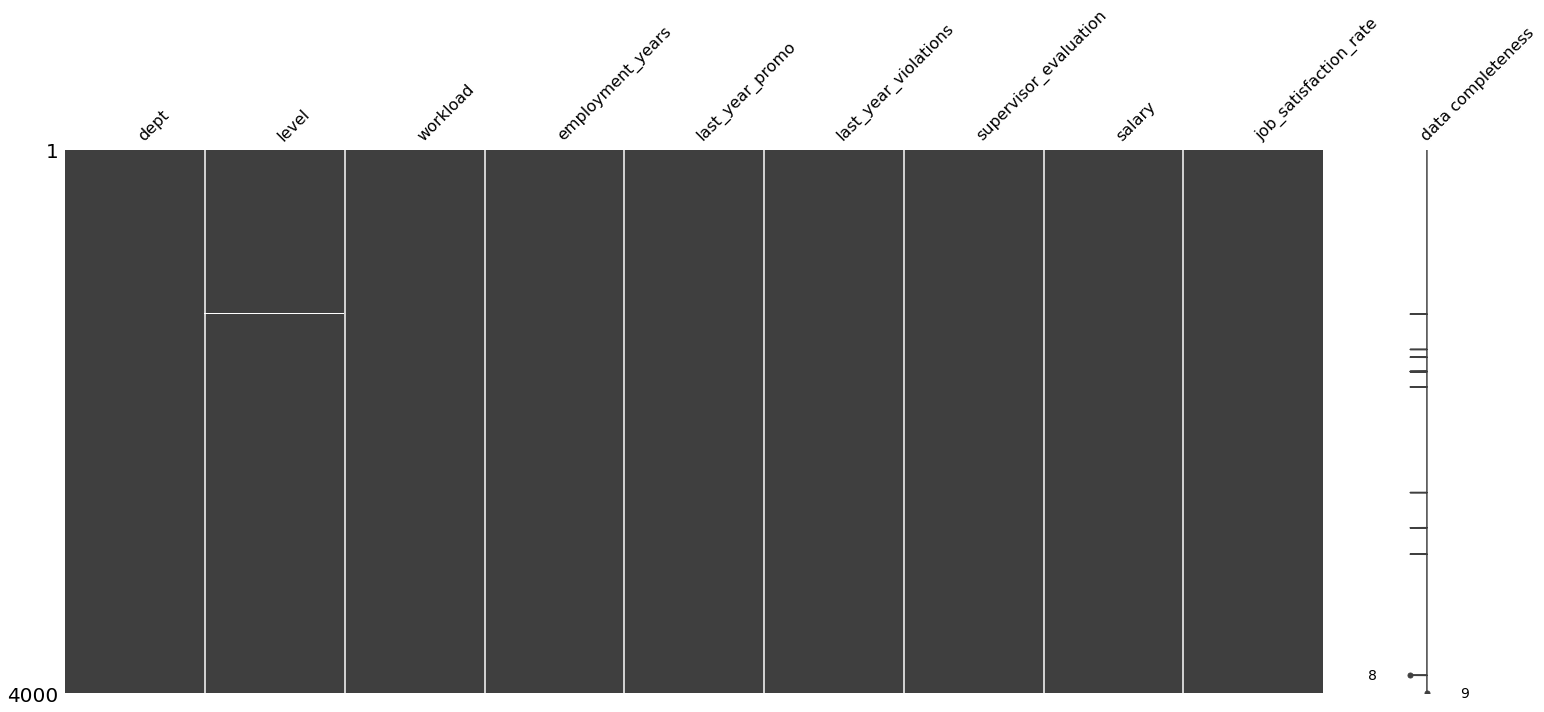

In [10]:
msno.matrix(statisfaction_train, labels=True)
plt.show()

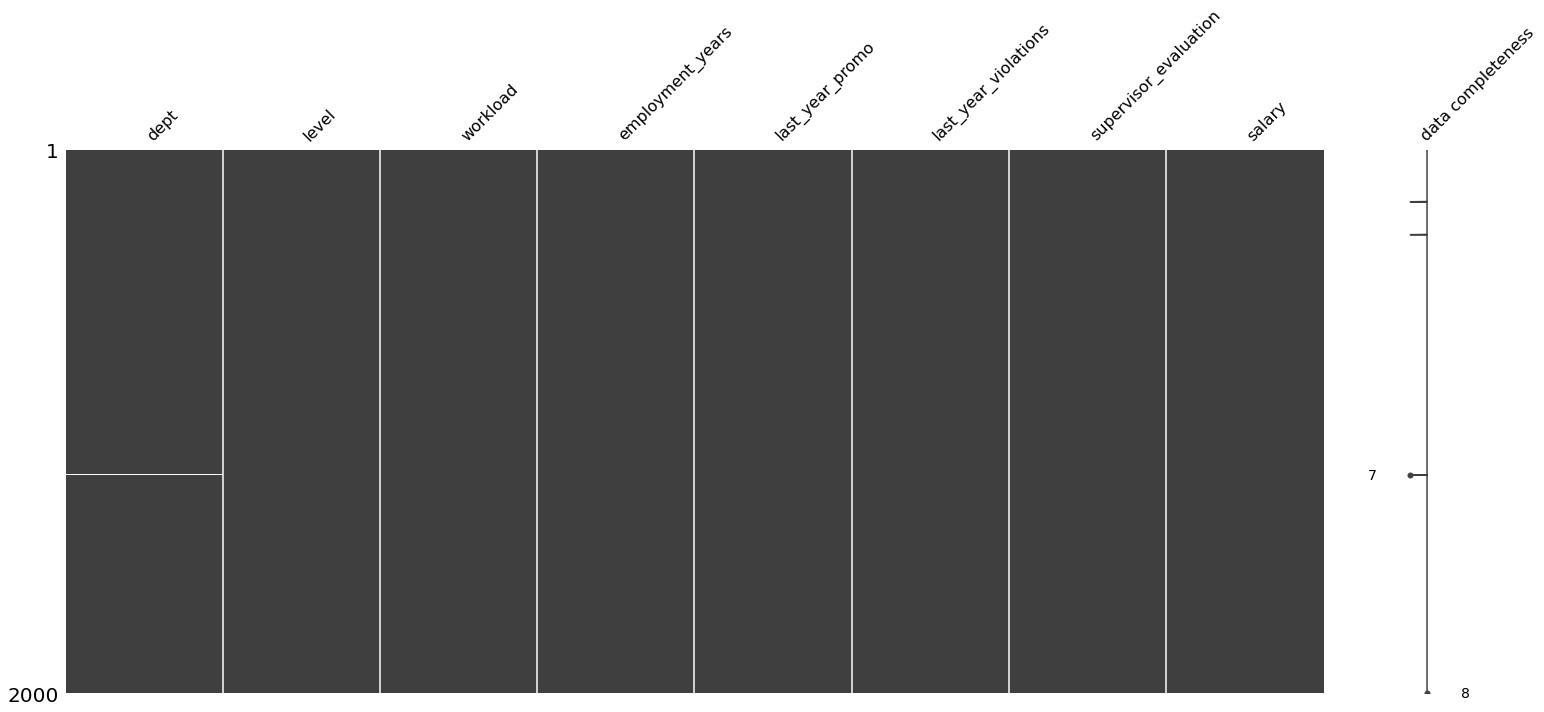

In [11]:
msno.matrix(test_features, labels=True)
plt.show()

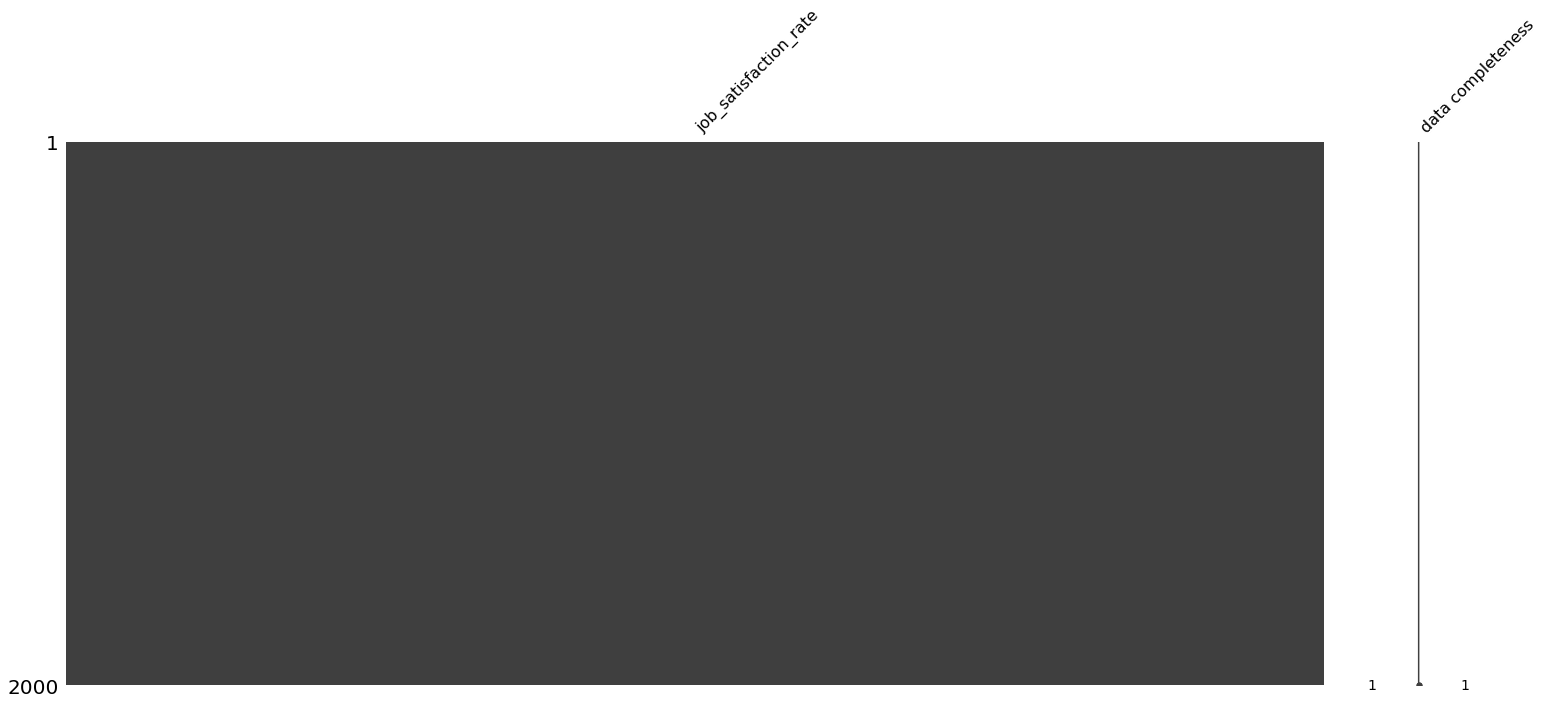

In [12]:
msno.matrix(test_target, labels=True)
plt.show()

В данных есть пропуски, заполним их с помощью пайплайна.

In [13]:
dataframes = [statisfaction_train,test_features,test_target,]
for df in dataframes:
    print(df.duplicated().sum())

245
557
1902


В данных много дубликатов, избавимся от них, что бы избежать переобучения.

In [14]:
statisfaction_train= statisfaction_train.drop_duplicates()

In [15]:
dataframes = [statisfaction_train,test_features,test_target,]
for df in dataframes:
    print(df.duplicated().sum())

0
557
1902


In [16]:
X_train = statisfaction_train.drop('job_satisfaction_rate', axis=1)
y_train = statisfaction_train.job_satisfaction_rate
print(X_train.duplicated().sum())
X_train = X_train.drop_duplicates()
y_train = y_train.loc[X_train.index]
print(X_train.duplicated().sum())

1247
0


Подготовил данные для обучения моделей и избавился от появившихся дубликатов

In [17]:
test_features.dept = test_features.dept.replace(' ', np.nan)
test_features.level = test_features.level.replace({' ':np.nan,'sinior':'senior'})
statisfaction_train.level = statisfaction_train.level.replace('sinior','senior')

В тестовых данных есть неочевидыне пропуски в виде ' ', заменим их на np.nan, что бы наш пайп смог их обработать. Так же в столбце level не верно записан уровень сотрудника, исправим это.

In [18]:
print(test_features.duplicated().sum())
print(test_target.duplicated().sum())

557
1902


In [19]:
ohe_columns = [
    'last_year_promo',
    'last_year_violations',
    'dept'
    
]
ord_columns = [
    'level',
    'workload'
]
num_columns = ['employment_years',
               'supervisor_evaluation',
               'salary']

ohe_pipe = Pipeline(
       [ ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output=False))
     ]
)

In [20]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'simpleImputer_before_ord_',
            SimpleImputer(missing_values=' ', strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[['junior', 'middle','senior'],['high','low','medium']],
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

preprocessing = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

pipe_final = Pipeline(
    [
        ('preprocessor', preprocessing)
    ]
)

print("Пропущенные значения до обработки:")
print(X_train.isna().sum())

X_train_transformed = pipe_final['preprocessor'].fit_transform(X_train, y_train)

transformed_columns = []
ohe_encoded_columns = pipe_final['preprocessor'].named_transformers_['ohe'].named_steps['ohe'].get_feature_names_out(ohe_columns)
transformed_columns.extend(ohe_encoded_columns)
transformed_columns.extend(ord_columns)
transformed_columns.extend(num_columns)

X_train_ = pd.DataFrame(X_train_transformed, columns=transformed_columns)

print("\nПропущенные значения до обработки:")
print(X_train_.isna().sum())

Пропущенные значения до обработки:
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

Пропущенные значения до обработки:
last_year_promo_yes         0
last_year_violations_yes    0
dept_marketing              0
dept_purchasing             0
dept_sales                  0
dept_technology             0
level                       0
workload                    0
employment_years            0
supervisor_evaluation       0
salary                      0
dtype: int64


In [21]:
X_test = test_features
y_test = test_target

print("Пропущенные значения до обработки:")
print(X_train.isna().sum())

X_test_transformed = pipe_final['preprocessor'].fit_transform(X_test, y_test)

transformed_columns = []
ohe_encoded_columns = pipe_final['preprocessor'].named_transformers_['ohe'].named_steps['ohe'].get_feature_names_out(ohe_columns)
transformed_columns.extend(ohe_encoded_columns)
transformed_columns.extend(ord_columns)
transformed_columns.extend(num_columns)

X_test_ = pd.DataFrame(X_test_transformed, columns=transformed_columns)

print("\nПропущенные значения до обработки:")
print(X_test_.isna().sum())

Пропущенные значения до обработки:
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

Пропущенные значения до обработки:
last_year_promo_yes         0
last_year_violations_yes    0
dept_marketing              0
dept_purchasing             0
dept_sales                  0
dept_technology             0
level                       0
workload                    0
employment_years            0
supervisor_evaluation       0
salary                      0
dtype: int64


В данных были найдены пропуски, поэтому заполних их в пайпе,что бы в будущем они не мешали обучению модели

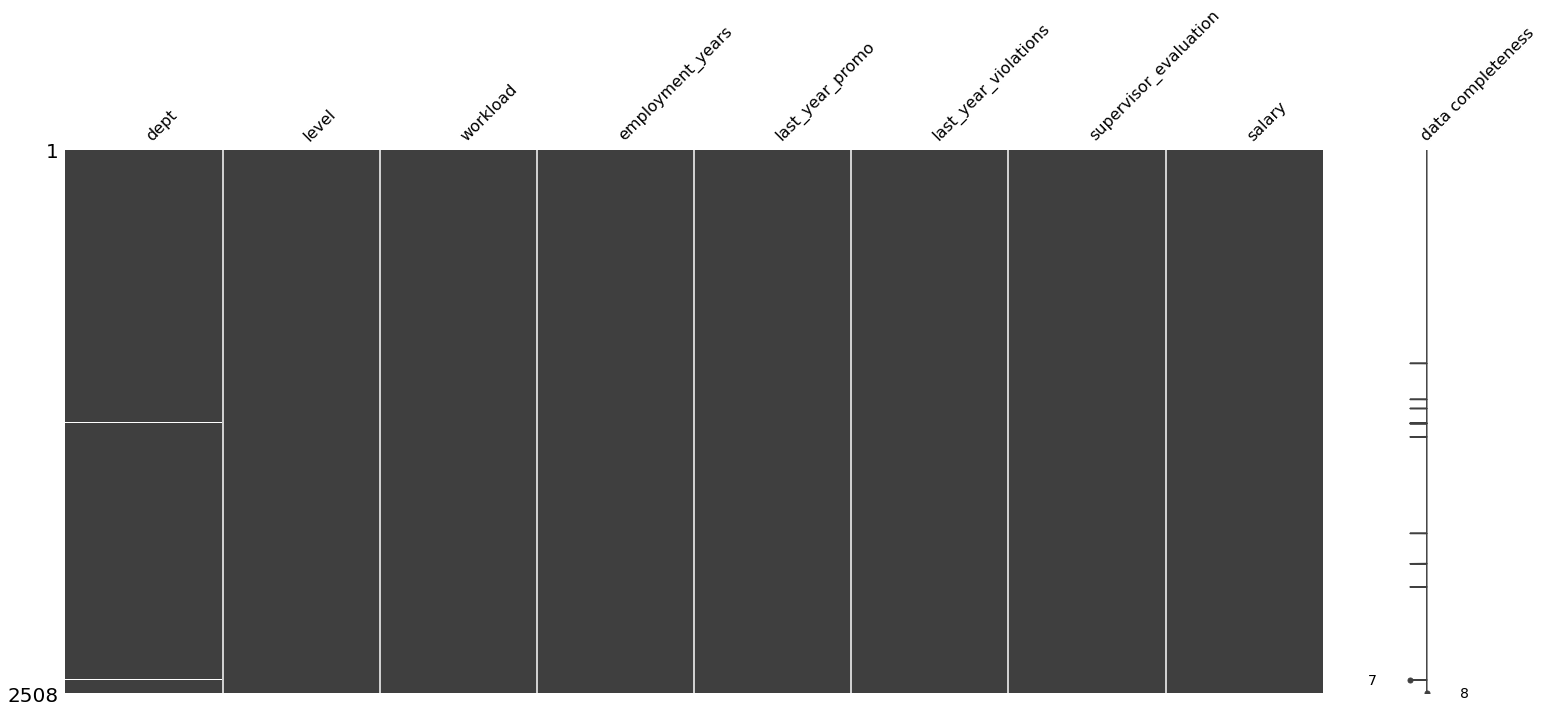

In [22]:
msno.matrix(X_train, labels=True)
plt.show()

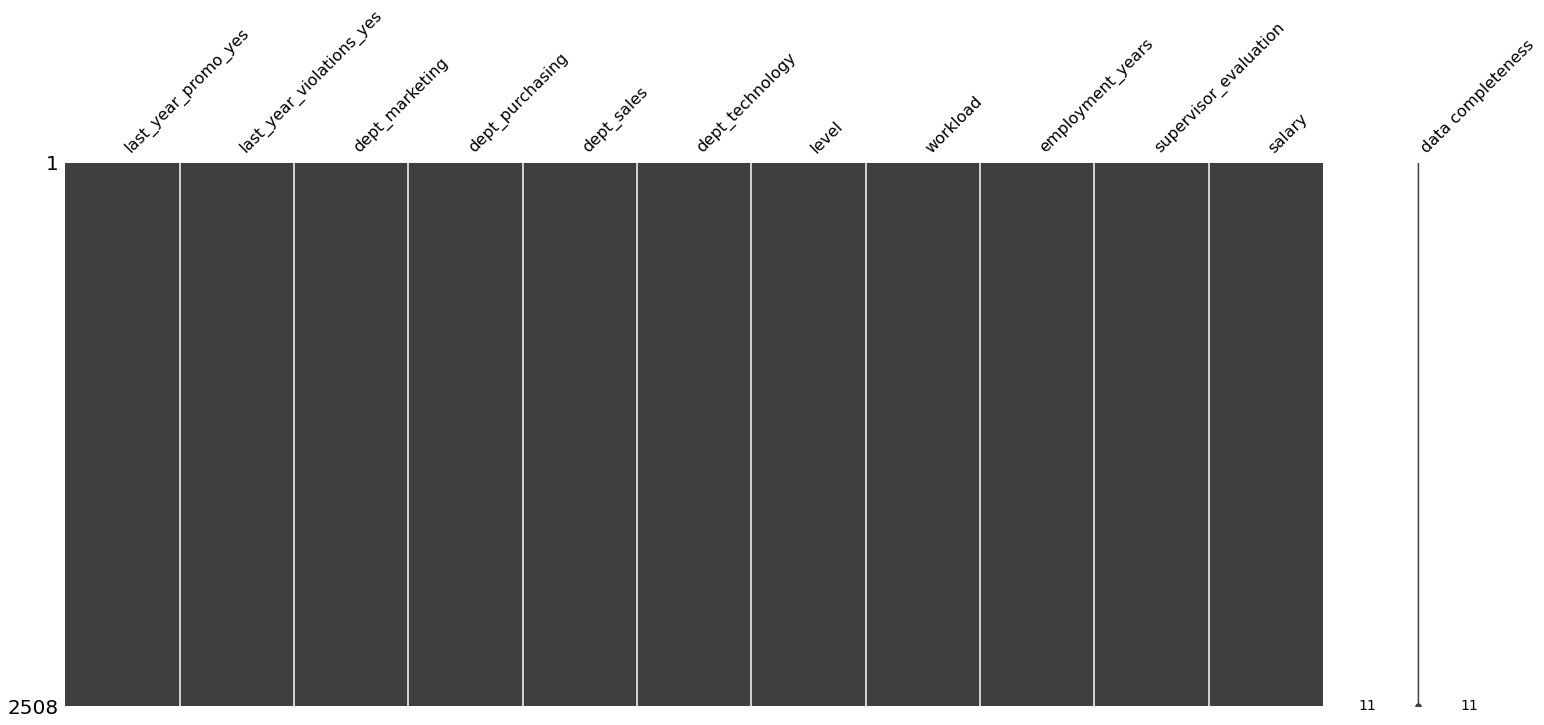

In [23]:
msno.matrix(X_train_, labels=True)
plt.show()

## Исследовательский анализ данных

In [24]:
#написал функции чтобы не повторялся код
def plotbar(df,ind,val,func,name,x,y):
    data=df.pivot_table(index=ind,values=val,aggfunc=func)
    data.plot.bar()
    plt.title(name)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

    
def plotbar_sort(df,ind,val,func,name,x,y):
    data=df.pivot_table(index=ind,values=val,aggfunc=func).sort_values(by=val,ascending=True)
    data.plot.bar()
    plt.title(name)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

    
def plotscatter(x,y,x_name,y_name,name):
    plt.scatter(x, y)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(name)
    legend = plt.legend()
    plt.show()


def pie(df,ind,title):
    counts = df[ind].value_counts()
    labels = counts.index
    plt.figure(figsize=(10, 10))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title, y=1.05)
    plt.axis('equal')
    plt.show()

### Анализ тренировочной выборки

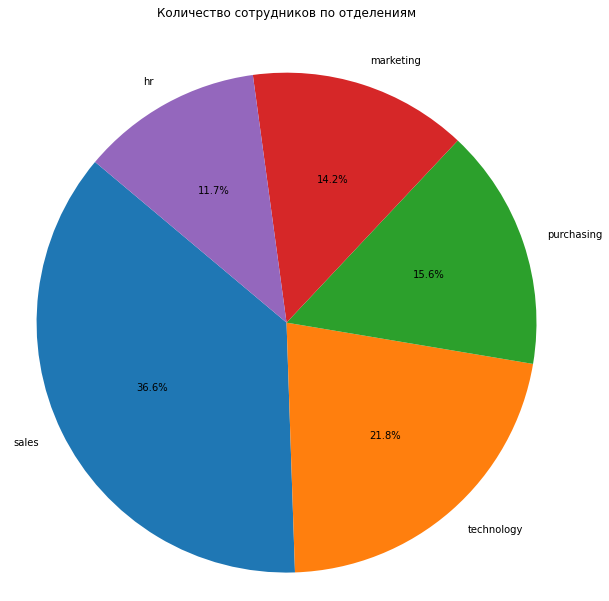

In [25]:
pie(statisfaction_train,'dept','Количество сотрудников по отделениям')

Большинство сотрудников работают в отделе продаж.

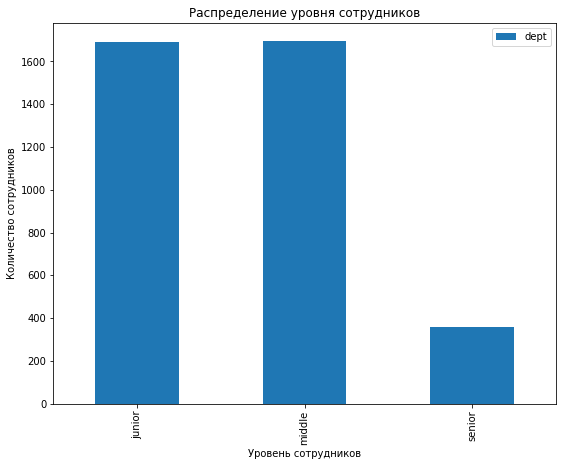

In [26]:
plotbar(statisfaction_train,'level','dept','count','Распределение уровня сотрудников','Уровень сотрудников','Количество сотрудников')

Большая часть сотрудников-джуны

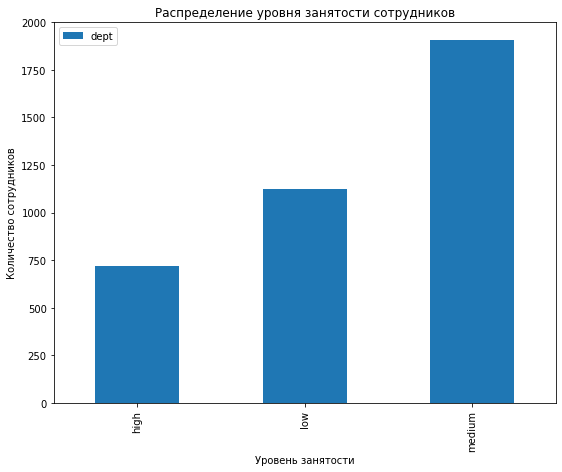

In [27]:
plotbar(statisfaction_train,'workload','dept','count','Распределение уровня занятости сотрудников','Уровень занятости','Количество сотрудников')

У большинства сотрудников средний уровень нагрузки

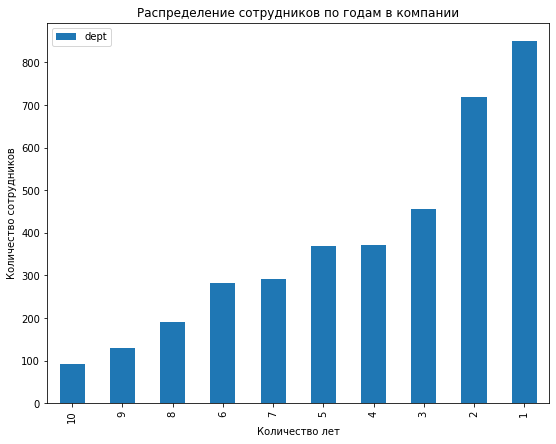

In [28]:
plotbar_sort(statisfaction_train,'employment_years','dept','count','Распределение сотрудников по годам в компании','Количество лет','Количество сотрудников')

Большинство сотрудников работают 1-2 года, что не удивительно, ведь мы уже выяснили, что большинство сотрудников-джуны

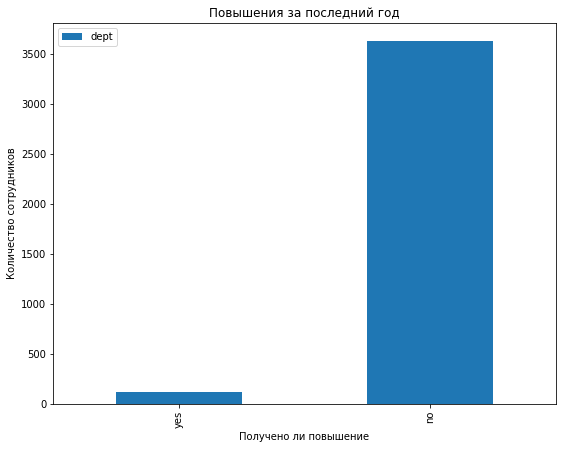

In [29]:
plotbar_sort(statisfaction_train,'last_year_promo','dept','count','Повышения за последний год','Получено ли повышение','Количество сотрудников')

Очень мало сотрудников получили повышение за последний год(

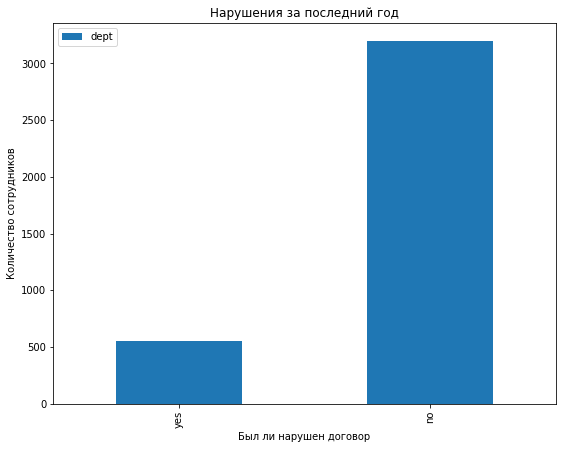

In [30]:
plotbar_sort(statisfaction_train,'last_year_violations','dept','count','Нарушения за последний год','Был ли нарушен договор','Количество сотрудников')

Договор нарушают не часто

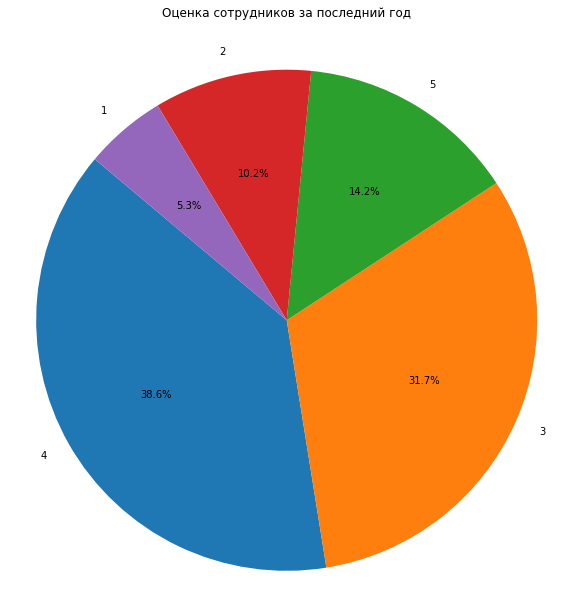

In [31]:
pie(statisfaction_train,'supervisor_evaluation','Оценка сотрудников за последний год')

Большинство работают нормально или хорошо

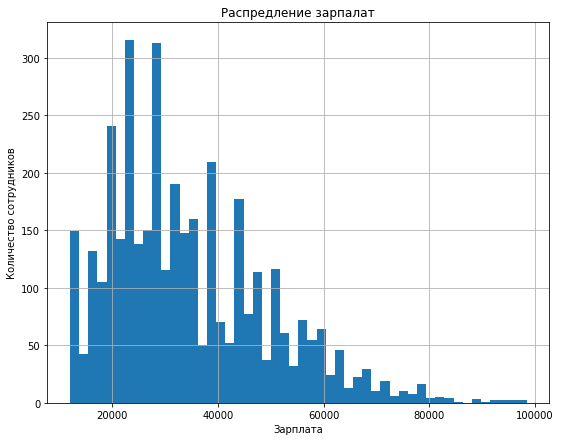

In [32]:
statisfaction_train.salary.hist(bins=50)
plt.title('Распредление зарпалат')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.show()

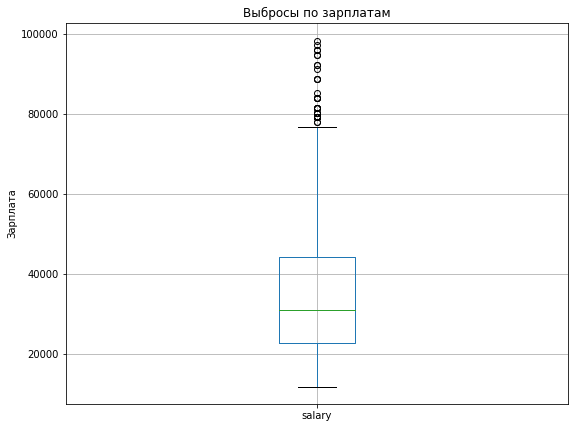

In [33]:
statisfaction_train.boxplot(column='salary')
plt.title('Выбросы по зарплатам')
plt.ylabel('Зарплата')
plt.show()

Критичных выбросов нет, поэтому все нормально

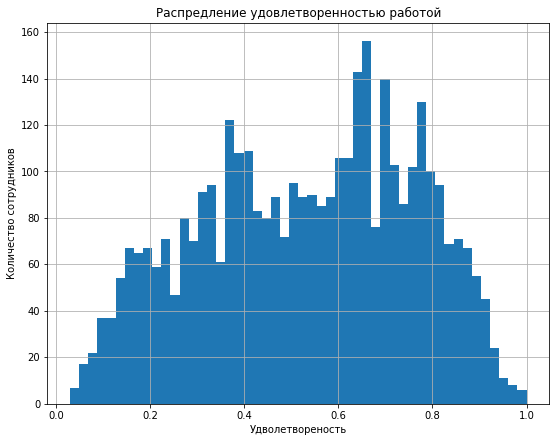

In [34]:
statisfaction_train.job_satisfaction_rate.hist(bins=50)
plt.title('Распредление удовлетворенностью работой')
plt.xlabel('Удволетвореность')
plt.ylabel('Количество сотрудников')
plt.show()

В целом сотрудники удовлетворены своей работой

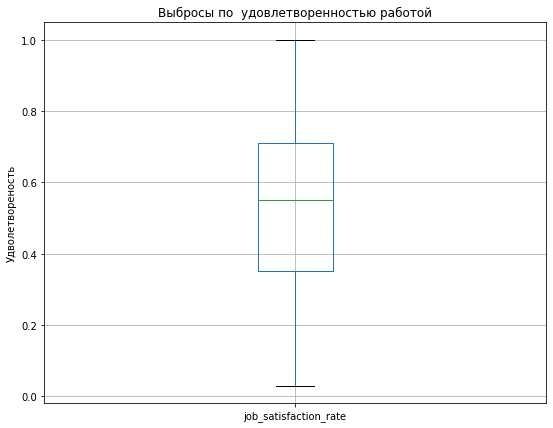

In [35]:
statisfaction_train.boxplot(column='job_satisfaction_rate')
plt.title('Выбросы по  удовлетворенностью работой')
plt.ylabel('Удволетвореность')
plt.show()

### Анализ тестовой выборки

In [36]:
test_features.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800


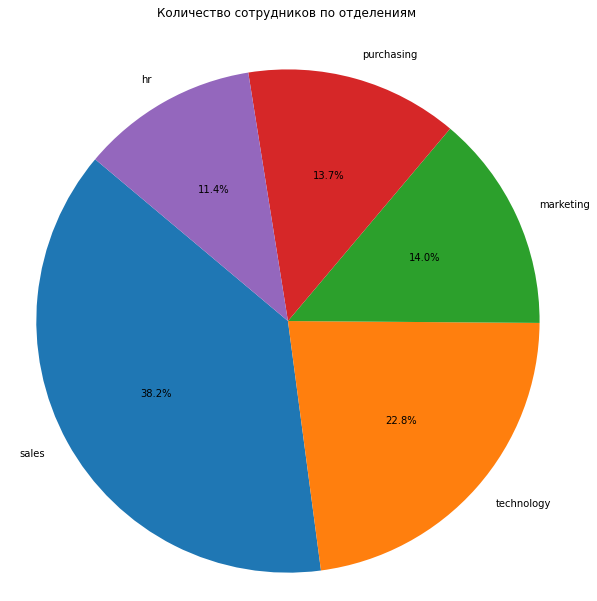

In [37]:
pie(test_features,'dept','Количество сотрудников по отделениям')

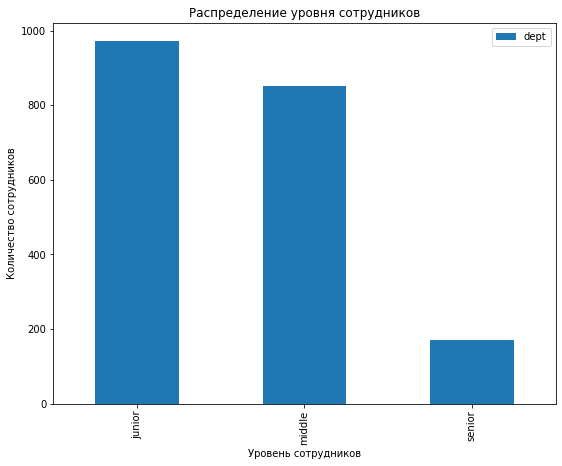

In [38]:
plotbar(test_features,'level','dept','count','Распределение уровня сотрудников','Уровень сотрудников','Количество сотрудников')

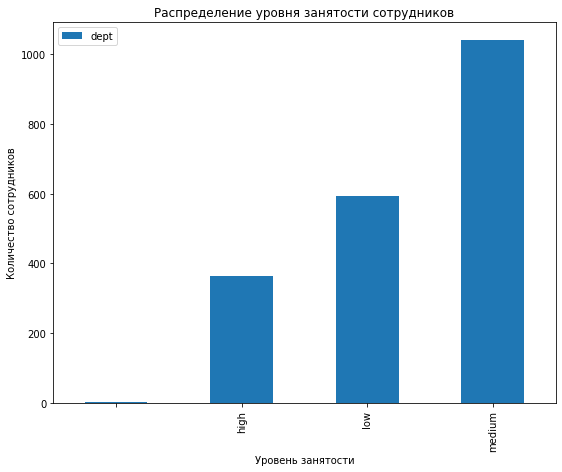

In [39]:
plotbar(test_features,'workload','dept','count','Распределение уровня занятости сотрудников','Уровень занятости','Количество сотрудников')

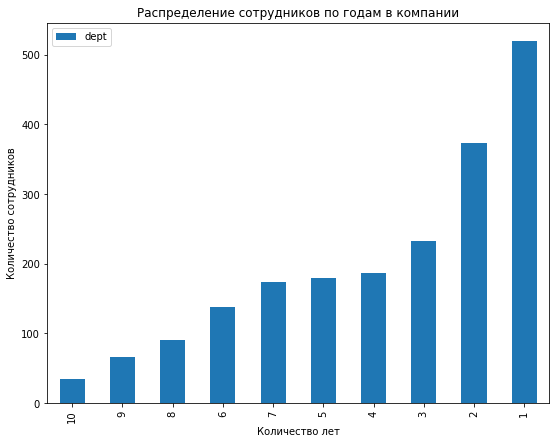

In [40]:
plotbar_sort(test_features,'employment_years','dept','count','Распределение сотрудников по годам в компании','Количество лет','Количество сотрудников')

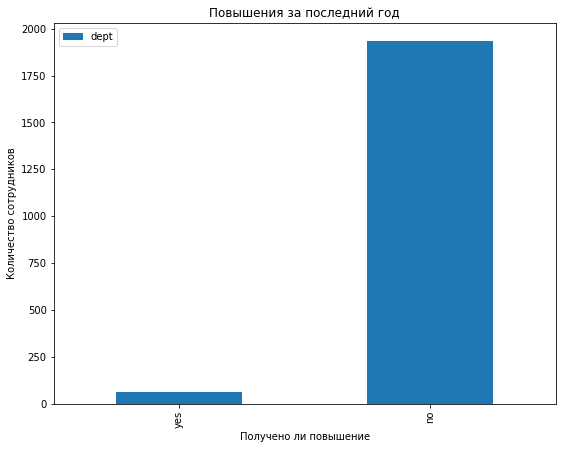

In [41]:
plotbar_sort(test_features,'last_year_promo','dept','count','Повышения за последний год','Получено ли повышение','Количество сотрудников')

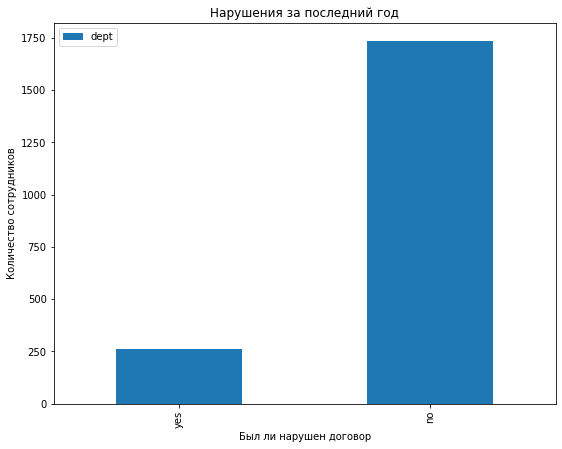

In [42]:
plotbar_sort(test_features,'last_year_violations','dept','count','Нарушения за последний год','Был ли нарушен договор','Количество сотрудников')

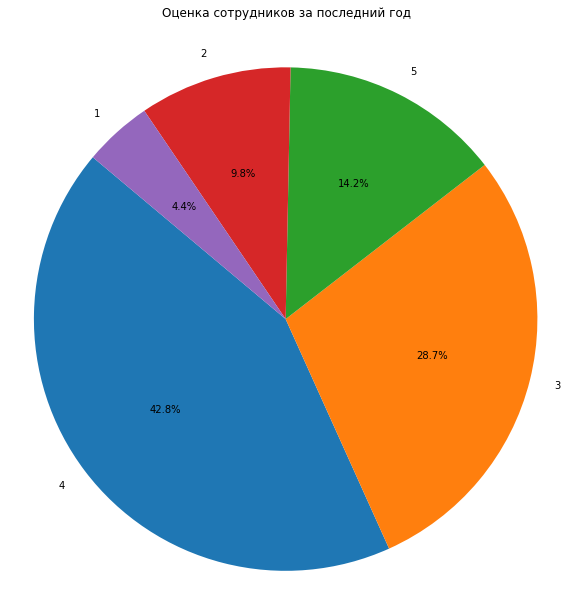

In [43]:
pie(test_features,'supervisor_evaluation','Оценка сотрудников за последний год')

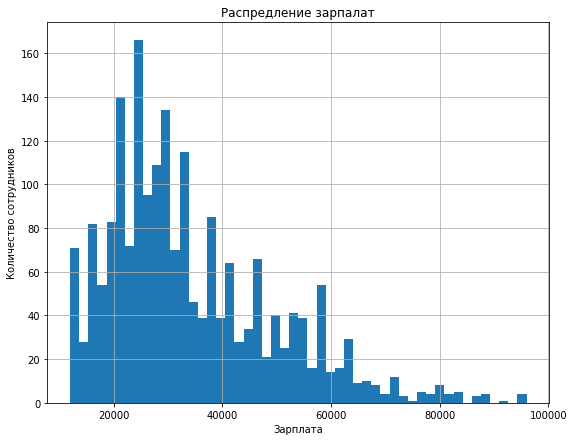

In [44]:
test_features.salary.hist(bins=50)
plt.title('Распредление зарпалат')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.show()

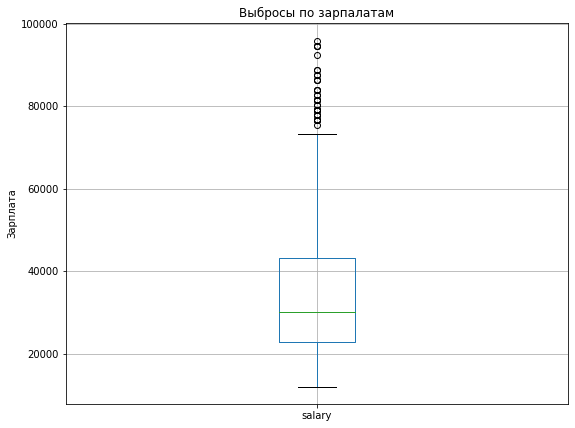

In [45]:
test_features.boxplot(column='salary')
plt.title('Выбросы по зарпалатам')
plt.ylabel('Зарплата')
plt.show()

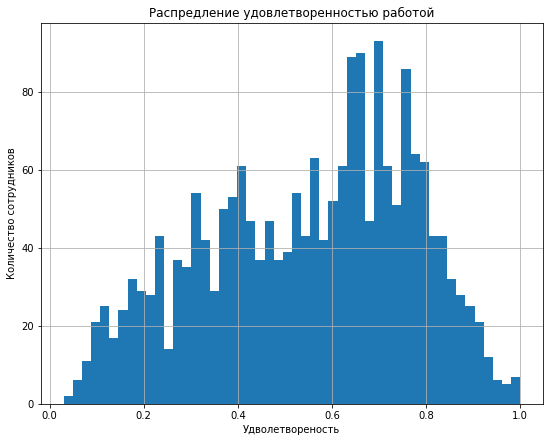

In [46]:
test_target.job_satisfaction_rate.hist(bins=50)
plt.title('Распредление удовлетворенностью работой')
plt.xlabel('Удволетвореность')
plt.ylabel('Количество сотрудников')
plt.show()

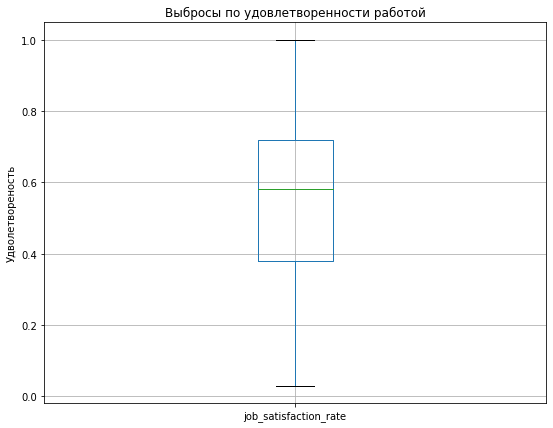

In [47]:
test_target.boxplot(column='job_satisfaction_rate')
plt.title('Выбросы по удовлетворенности работой')
plt.ylabel('Удволетвореность')
plt.show()

В тестовой выборке данные очень похожи, поэтому не вижу смысла их коментировать

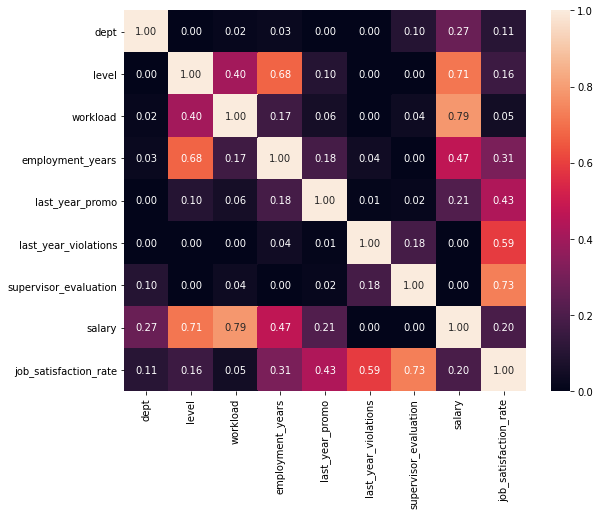

In [48]:
phik = phik_matrix(statisfaction_train,interval_cols=['salary','job_statisfaction_rate'])
plt.figure()
sns.heatmap(phik, annot=True, fmt='.2f')
plt.show()

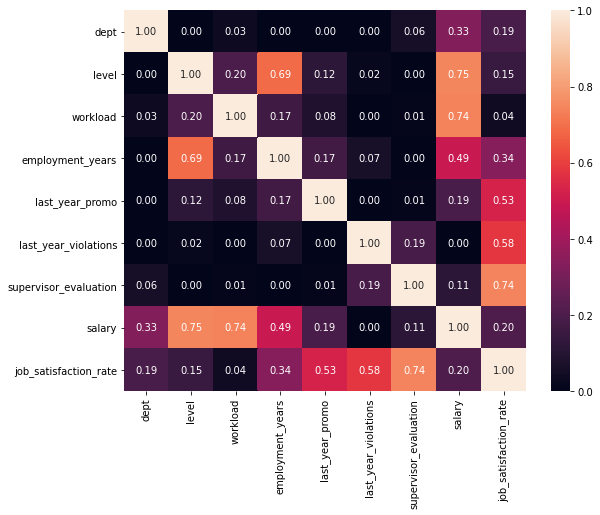

In [49]:
test = test_features.join(test_target)
phik = phik_matrix(test,interval_cols=['salary','job_statisfaction_rate'])
plt.figure()
sns.heatmap(phik, annot=True, fmt='.2f')
plt.show()

Что на тренировочной, что на тестовой выборке таргет сильнее всего корелирует с оценкой руководителя.

## Обучение моделей 

In [50]:
RANDOM_STATE = 42

pipe_final = Pipeline(
    [
        ('preprocessor', preprocessing),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ]
)

param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 20),
        'models__min_samples_split': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },

    {
        'models': [RandomForestRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 20),
        'models__min_samples_split': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']

    },
]

Создал пайп для обучения модели и создал парметры по которым грид выбирет одну из 2 моих моделей (DecisionTreeRegressor и LinearRegression). 

In [51]:
def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

smape_scorer = make_scorer(smape, greater_is_better=False)

In [52]:
grid = RandomizedSearchCV(
    pipe_final,
    random_state = RANDOM_STATE,
    param_distributions=param_grid,
    cv=5,
    scoring=smape_scorer,
    n_jobs=-1)

In [53]:
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['last_year_promo',
                                                                                'last_year_violations',
                                                                                'dept']),
                                                                              ('ord',
                                                                               Pip...
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']},
                                        {'models': [RandomForestRegressor(random_state=42)],
                                         'models__max_depth': range(2, 20),
                                         'models__min_samples_split': range(2, 20),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [54]:
best_model = grid.best_estimator_
print('Лучшая модель и её параметры:\n\n', best_model)
print('Значение метрики:', -grid.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['last_year_promo',
                                                   'last_year_violations',
                                                   'dept']),
                                  

Создал функцию для расчета smape метрики и с помощью сетки определил и обучил лучшую(на основе моей метрики) модель.

In [55]:
X_test = X_test.sort_values(by='id')
y_test = y_test.sort_values(by='id')

y_pred = grid.predict(X_test)
y_test_np = y_test.values.ravel()  

smape_value = smape(y_test_np, y_pred)
print('SMAPE на тестовой выборке:', smape_value)

SMAPE на тестовой выборке: 12.8288113815442


Проверил метрику на тестовой выборке, все хорошо.

In [56]:
dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(X_train, y_train)

y_pred_dummy = dummy_regressor.predict(X_test)
smape_dummy = smape(y_test_np, y_pred_dummy)

print(smape_dummy)

38.811078852384206


Проверил модель на адекватность с помощью DummyRegressor. Результат моей модели на тестовой выборке сильно лучше чем у DummyRegressor, значит все хорошо.

## Промежуточный вывод

По итогу 1 задачи лучшей моделью для предсказания удовлетворенности сотрудников стала DecisionTreeRegressor.Думаю, это произошло из за того, что DecisionTreeRegressor автоматически выбирает наиболее информативные признаки для разделения, что может уменьшить влияние неинформативных признаков на качество модели.

# Задача 2

## Загрузка данных

In [57]:
train_quit = pd.read_csv('/datasets/train_quit.csv', delimiter=',',parse_dates=True,index_col='id')
test_features = pd.read_csv('/datasets/test_features.csv', delimiter=',',parse_dates=True,index_col='id')
test_target_quit = pd.read_csv('/datasets/test_target_quit.csv', delimiter=',',parse_dates=True)

In [58]:
display(train_quit.head())
train_quit.info()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB


In [59]:
display(test_target_quit.head())
test_target_quit.info()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


С типами и названиями данных все нормально.

## Предобработка данных

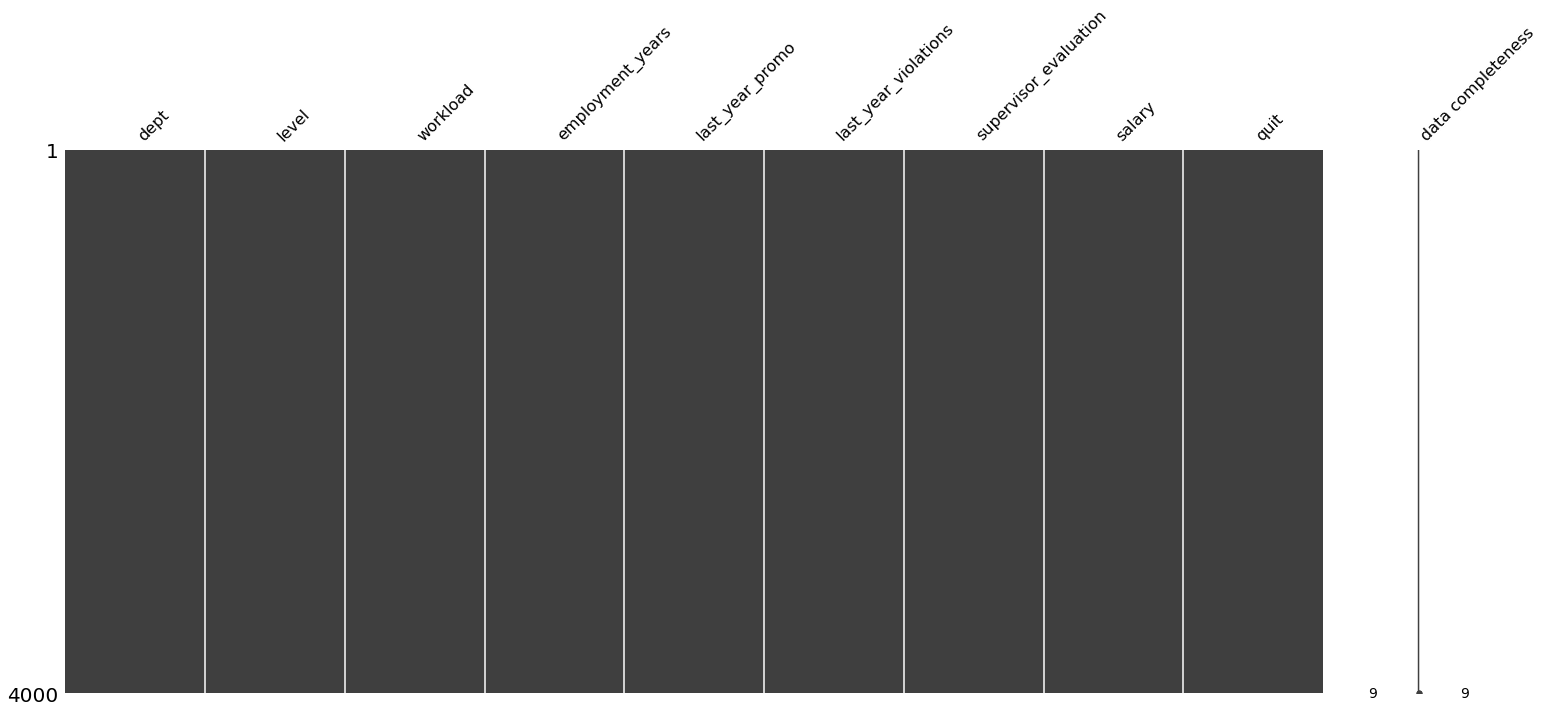

In [60]:
msno.matrix(train_quit, labels=True)
plt.show()

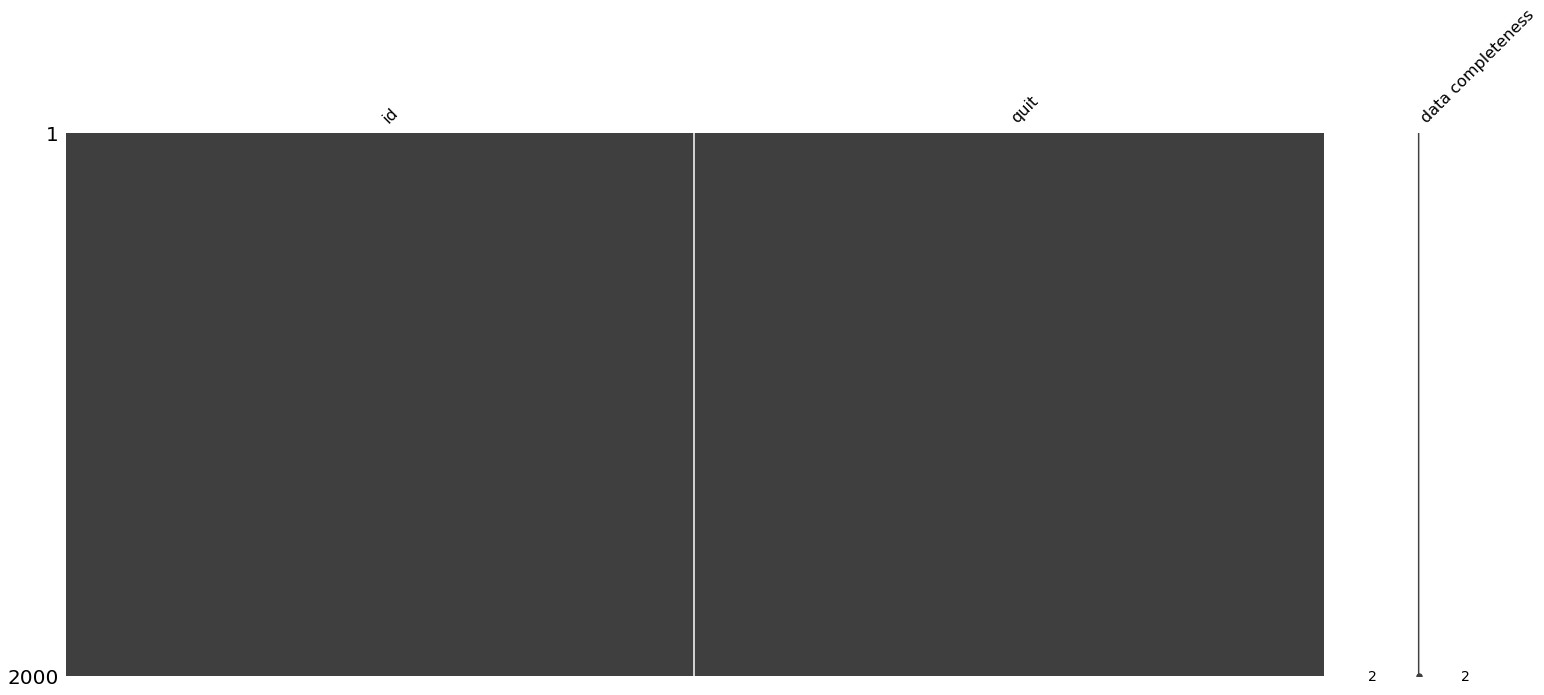

In [61]:
msno.matrix(test_target_quit, labels=True)
plt.show()

Пропусков в данных нет.

In [62]:
dataframes = [train_quit,test_target_quit]
for df in dataframes:
    print(df.duplicated().sum())

1413
0


Полных дублтикатов так же нет.

## Иследовательский анализ данных

In [63]:
train_quit.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no


### Анализ тренировочной выборки

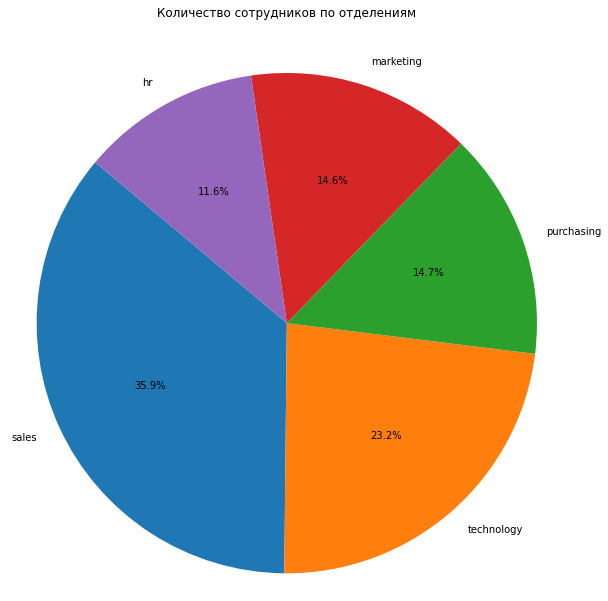

In [64]:
pie(train_quit,'dept','Количество сотрудников по отделениям')

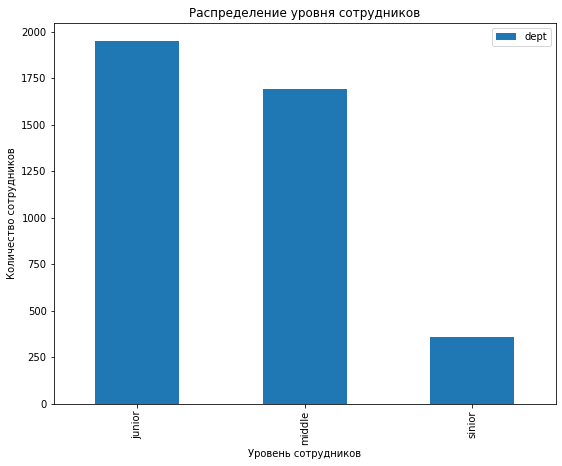

In [65]:
plotbar(train_quit,'level','dept','count','Распределение уровня сотрудников','Уровень сотрудников','Количество сотрудников')

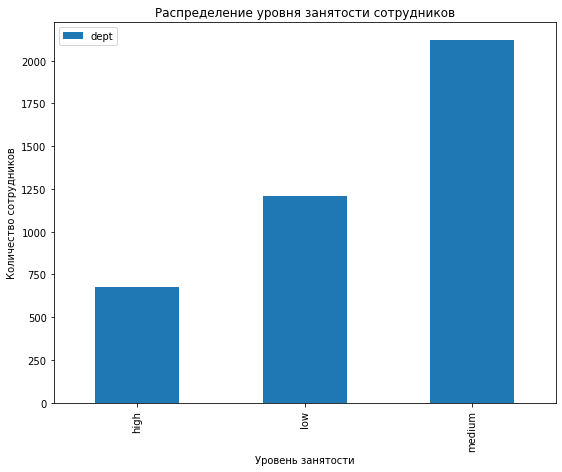

In [66]:
plotbar(train_quit,'workload','dept','count','Распределение уровня занятости сотрудников','Уровень занятости','Количество сотрудников')

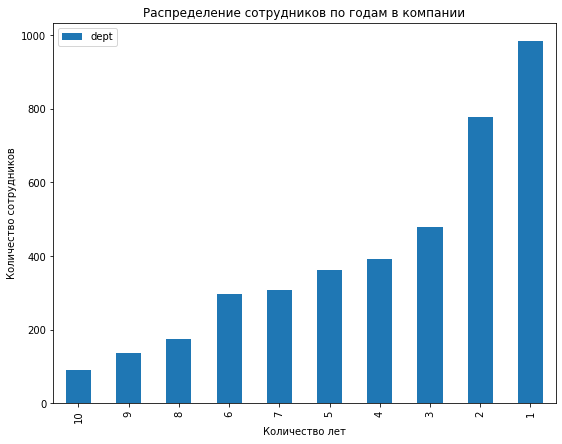

In [67]:
plotbar_sort(train_quit,'employment_years','dept','count','Распределение сотрудников по годам в компании','Количество лет','Количество сотрудников')

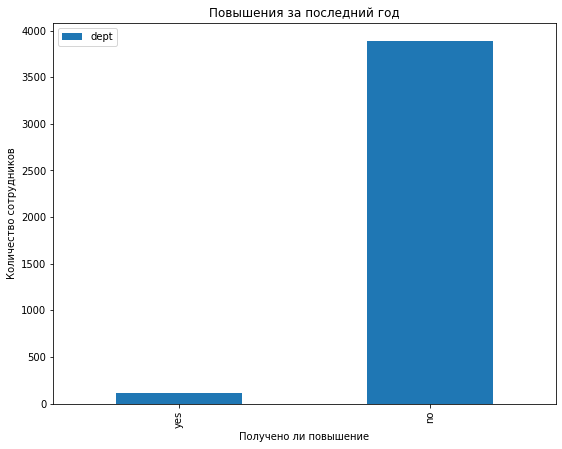

In [68]:
plotbar_sort(train_quit,'last_year_promo','dept','count','Повышения за последний год','Получено ли повышение','Количество сотрудников')

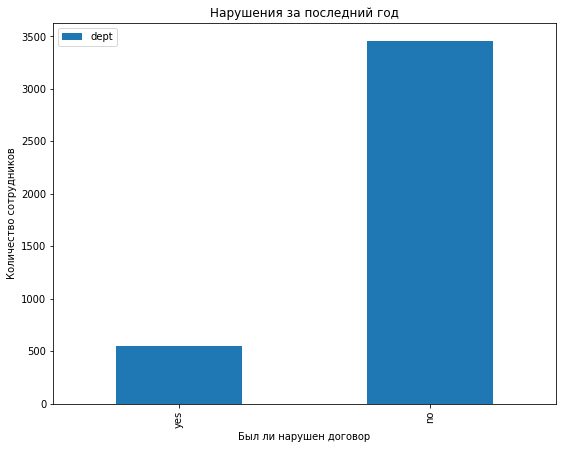

In [69]:
plotbar_sort(train_quit,'last_year_violations','dept','count','Нарушения за последний год','Был ли нарушен договор','Количество сотрудников')

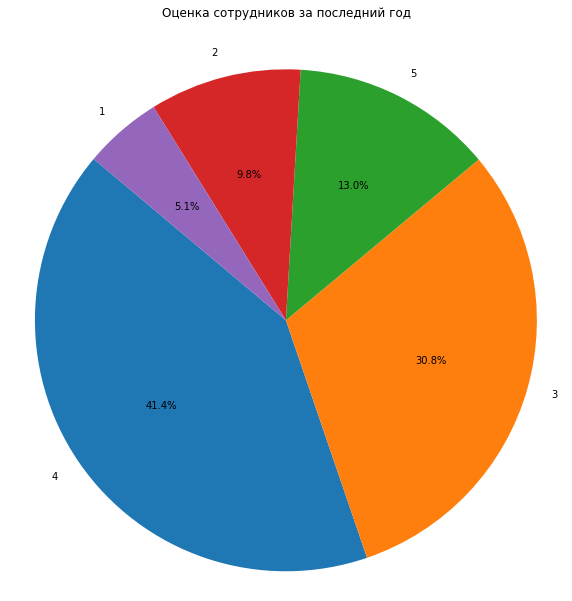

In [70]:
pie(train_quit,'supervisor_evaluation','Оценка сотрудников за последний год')

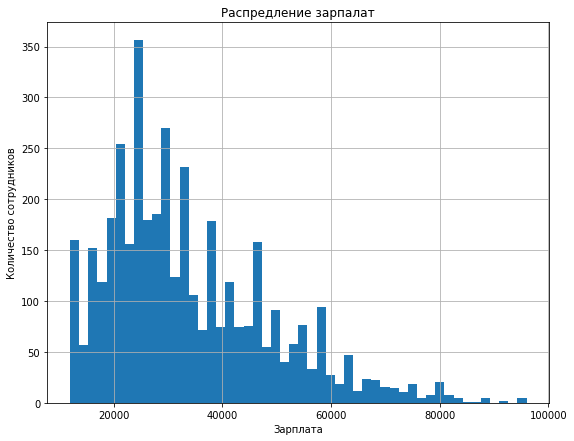

In [71]:
train_quit.salary.hist(bins=50)
plt.title('Распредление зарпалат')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.show()

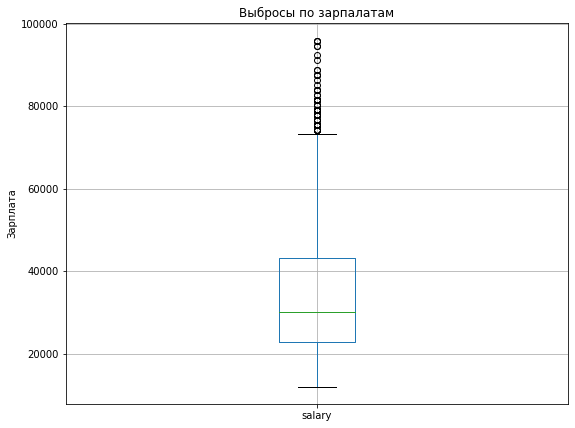

In [72]:
train_quit.boxplot(column='salary')
plt.title('Выбросы по зарпалатам')
plt.ylabel('Зарплата')
plt.show()

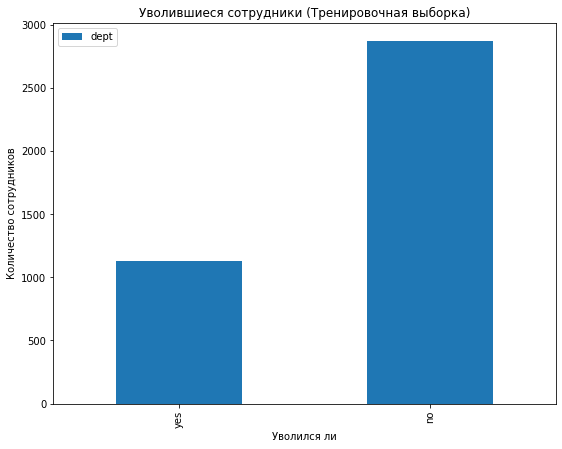

In [73]:
plotbar_sort(train_quit,'quit','dept','count','Уволившиеся сотрудники (Тренировочная выборка)','Уволился ли','Количество сотрудников')

Обучающая выборка очень похожа на предудущую, поэтому не давал коментариев и здесь. Но в этих данных присутсвует новый столбец quit. Он показывает уволился ли сотрудник или нет, как мы видим почти треть сотрудников уволилась.

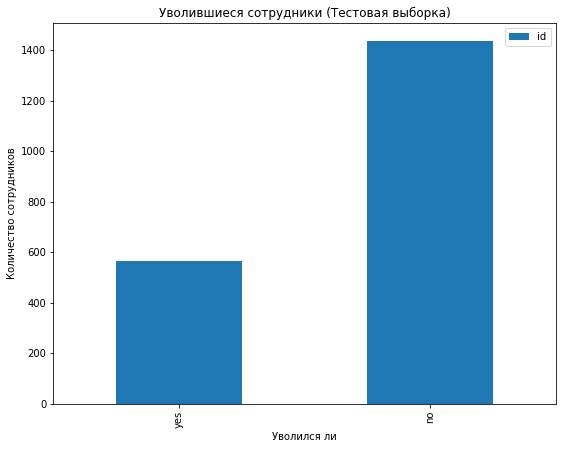

In [74]:
plotbar_sort(test_target_quit,'quit','id','count','Уволившиеся сотрудники (Тестовая выборка)','Уволился ли','Количество сотрудников')

В тестовой выборке такая же ситуация, треть сотрудников уволилалась.

## Портрет уволившегося сотрудника

Что бы создать портрет надо сначало отобрать данные по уволившимся сотрудникам.

In [75]:
quited = train_quit.query("quit == 'yes'")
quited.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
257132,sales,junior,medium,2,no,yes,3,24000,yes
699916,sales,junior,low,1,no,yes,3,18000,yes
613206,technology,middle,medium,2,no,no,3,45600,yes
468145,technology,junior,medium,2,no,no,3,30000,yes
982346,marketing,junior,medium,3,no,no,3,30000,yes


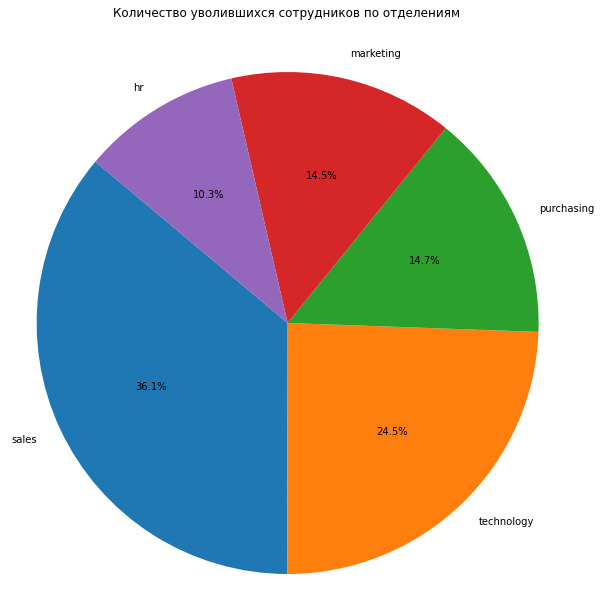

In [76]:
pie(quited,'dept','Количество уволившихся сотрудников по отделениям')

Большинство работало в продажах, но это не удивительно, ведь в целом большинство сотрудников компании работают в этом отделе.

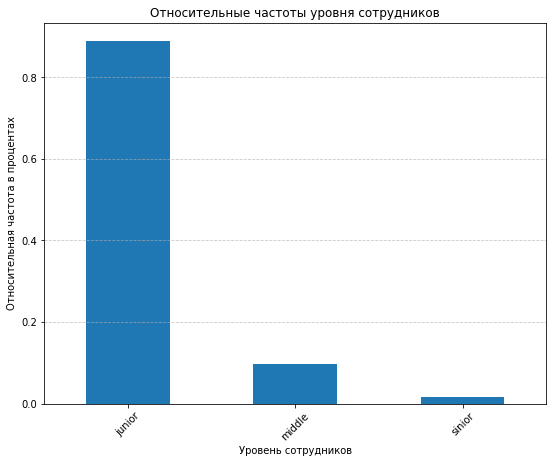

In [77]:
relative_frequencies = quited['level'].value_counts(normalize=True)

relative_frequencies.plot(kind='bar')
plt.title('Относительные частоты уровня сотрудников')
plt.xlabel('Уровень сотрудников')
plt.ylabel('Относительная частота в процентах')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Большая часть этих сотрудников являлись джунами.

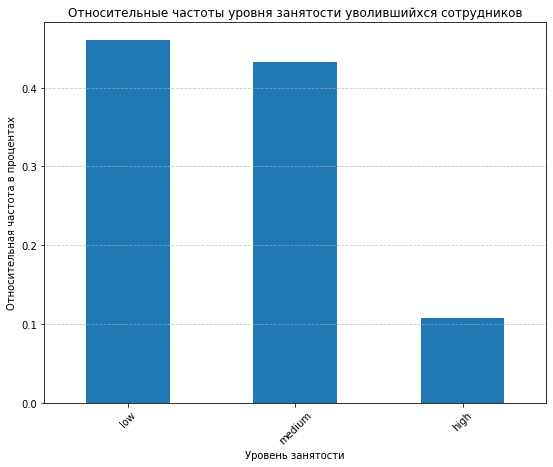

In [78]:
relative_frequencies = quited['workload'].value_counts(normalize=True)

relative_frequencies.plot(kind='bar')
plt.title('Относительные частоты уровня занятости уволившийхся сотрудников')
plt.xlabel('Уровень занятости')
plt.ylabel('Относительная частота в процентах')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Их занятость была либо низкой либо средней (в основном)

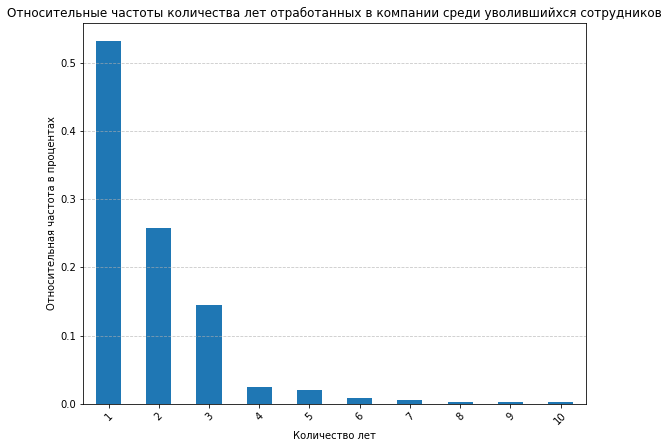

In [79]:
relative_frequencies = quited['employment_years'].value_counts(normalize=True)

relative_frequencies.plot(kind='bar')
plt.title('Относительные частоты количества лет отработанных в компании среди уволившийхся сотрудников')
plt.xlabel('Количество лет')
plt.ylabel('Относительная частота в процентах')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Большинство отработало менее 3 лет.

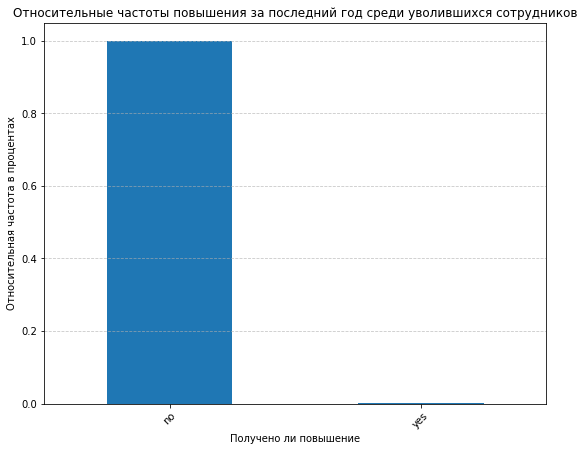

In [80]:
relative_frequencies = quited['last_year_promo'].value_counts(normalize=True)

relative_frequencies.plot(kind='bar')
plt.title('Относительные частоты повышения за последний год среди уволившихся сотрудников')
plt.xlabel('Получено ли повышение')
plt.ylabel('Относительная частота в процентах')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Почти никого из них не повысели

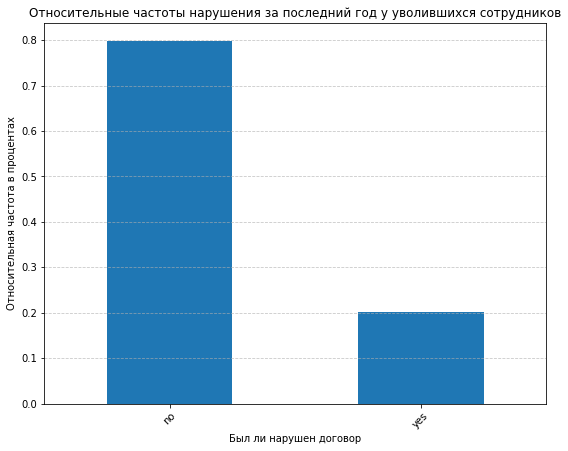

In [81]:
relative_frequencies = quited['last_year_violations'].value_counts(normalize=True)

relative_frequencies.plot(kind='bar')
plt.title('Относительные частоты нарушения за последний год у уволившихся сотрудников')
plt.xlabel('Был ли нарушен договор')
plt.ylabel('Относительная частота в процентах')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Большая часть из них не нарушала договор.

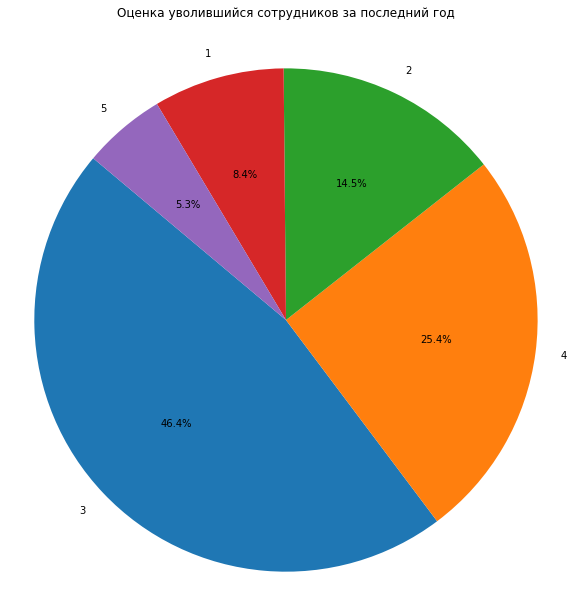

In [82]:
pie(quited,'supervisor_evaluation','Оценка уволившийся сотрудников за последний год')

Но работали они в большинстве своем нормально.

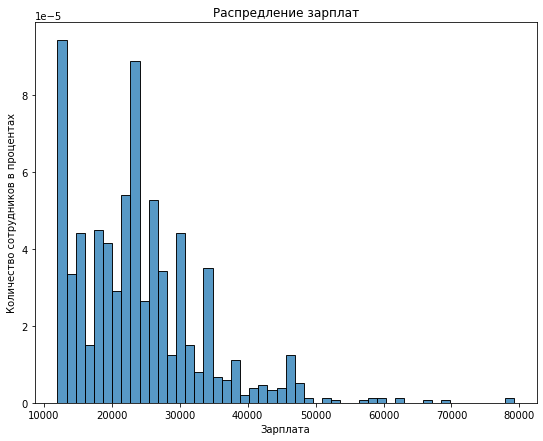

In [83]:
sns.histplot(data=quited, 
             x="salary", 
             bins=50,  
             multiple="stack",
             stat='density', 
             common_norm=False);
plt.title('Распредление зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников в процентах')
plt.show()

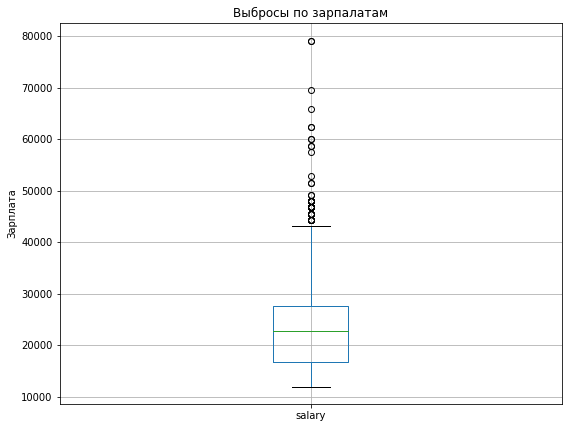

In [84]:
quited.boxplot(column='salary')
plt.title('Выбросы по зарпалатам')
plt.ylabel('Зарплата')
plt.show()

Зарабатывали они весьма мало, скорее всего это и послужило поводом для увольнения.

## Добавление нового входного признака

In [85]:
x = train_quit.drop('quit',axis=1)
train_quit['job_satisfaction_rate'] = grid.predict(x)
test_features['job_satisfaction_rate'] = grid.predict(test_features)

X_train_2 = train_quit
X_train_2.head()

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.647818
814010,sales,junior,medium,2,no,no,4,27600,no,0.843446
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.404637
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.344607
910140,marketing,junior,medium,2,no,no,5,25200,no,0.752475


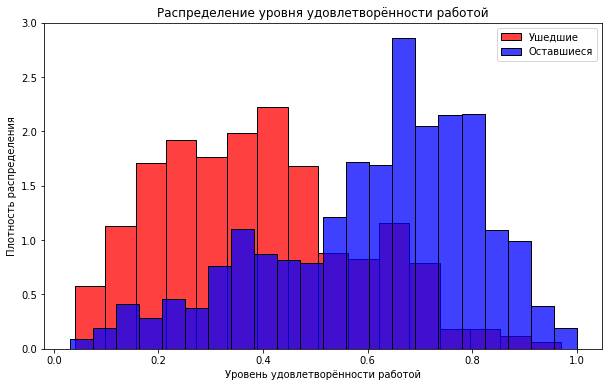

In [86]:
test_target_quit = test_target_quit.set_index('id')

test = test.join(test_target_quit)
left = test[test['quit'] == 'yes']
stayed = test[test['quit'] == 'no']

plt.figure(figsize=(10, 6))

sns.histplot(data=left, x='job_satisfaction_rate', color='red', label='Ушедшие', stat='density', common_norm=False)
sns.histplot(data=stayed, x='job_satisfaction_rate', color='blue', label='Оставшиеся', stat='density', common_norm=False)

plt.title('Распределение уровня удовлетворённости работой')
plt.xlabel('Уровень удовлетворённости работой')
plt.ylabel('Плотность распределения')
plt.legend()

plt.show()

График показывает, что большинство сотрудников, что уволились не особо любили свою работу. В то же время у боьшинства оставшихся удовлетворенность быше 0.6 . 

## Обучение модели

In [87]:
print(X_train_2.duplicated().sum())
X_train_2 = train_quit.drop('quit', axis=1)
X_train_2 = X_train_2.sort_values(by='id')

y_train_2 = train_quit.quit

X_train_2_no_duplicates = X_train_2.drop_duplicates()

y_train_2_filtered = y_train_2.loc[X_train_2_no_duplicates.index]

print(X_train_2_no_duplicates.duplicated().sum())

1413
0


В теренировочных данных после индексации появились дубли, что бы избежать переобучения их стоит удалить.

In [88]:
ohe_columns = [
    'last_year_promo',
    'last_year_violations',
    'dept']

ord_columns = ['level',
              'workload']

In [89]:
num_columns = ['employment_years',
               'supervisor_evaluation',
               'salary',
               'job_satisfaction_rate']

ohe_pipe = Pipeline(
       [ ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
     ]
)
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),

        (
            'ord',
            OrdinalEncoder(
                categories=[['junior', 'middle','sinior'],['high','low','medium']],
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

preprocessing = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

pipe_final = Pipeline(
    [
        ('preprocessor', preprocessing),
        ('models', RandomForestClassifier(random_state=RANDOM_STATE))
    ]
)

In [90]:
param_grid = [

    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },

    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 20),
        'models__min_samples_split': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']

    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
    }
]

In [91]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_2_filtered)
y_test_encoded = label_encoder.transform(test_target_quit.quit)

In [92]:
grid_2 = RandomizedSearchCV(
    pipe_final,
    random_state = RANDOM_STATE,
    param_distributions=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1)

In [93]:
grid_2.fit(X_train_2_no_duplicates, y_train_encoded)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['last_year_promo',
                                                                                'last_year_violations',
                                                                                'dept']),
                                                                              ('ord',
                                                                               Pip...
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']},
                                        {'models': [RandomForestClassifier(random_state=42)],
                                         'models__max_depth': range(2, 20),
                                         'models__min_samples_split': range(2, 20),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(random_state=42)]}],
                   random_state=42, scoring='roc_auc')

Нашел и обучил модель с помощью сетки.

In [94]:
test_features.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.901083
686555,hr,junior,medium,1,no,no,4,30000,0.667605
467458,sales,middle,low,5,no,no,4,19200,0.652122
418655,sales,middle,low,6,no,no,4,19200,0.656066
789145,hr,middle,medium,5,no,no,5,40800,0.783773


In [95]:
best_model_2 = grid_2.best_estimator_
print('Лучшая модель и её параметры:\n\n', best_model_2)
print('Лучший результат метрики:', grid_2.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['last_year_promo',
                                                   'last_year_violations',
                                                   'dept']),
                                  

Лучшей моделью стал случайный лес.

In [96]:
y_test_encoded = label_encoder.transform(test_target_quit.quit)
test_features = test_features.sort_values(by='id')
test_target_quit = test_target_quit.sort_values(by='id')

test_features.dept = test_features.dept.replace(' ', np.nan)
test_features.level = test_features.level.replace(' ', np.nan)

x_test = test_features
x_test['job_satisfaction_rate'] = grid.predict(x_test)

y_probabilities = best_model_2.predict_proba(x_test)[:,1]
roc_auc = roc_auc_score(y_test_encoded, y_probabilities)
print("ROC AUC:", roc_auc)

ROC AUC: 0.4943962494320314


Проверил значения метркии на тестовых данных, 93% это отличный результат. 

In [97]:
dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(X_train_2_no_duplicates, y_train_encoded)

y_pred_dummy = dummy_regressor.predict(x_test)
roc_auc = roc_auc_score(test_target_quit.quit, y_pred_dummy)

print(roc_auc)

0.5


Значение полученное моделью равно 0.5, что фактически обычное угадывание. Получивщаяся модель значительно лучше dummy, значит все хорошо

## Промежуточный вывод.

В этот раз лучшей моделью стал случайный лес. Случайный лес - это мощный ансамблевый метод машинного обучения, который состоит из множества деревьев решений. У этой модели высокая точность предсказаний, она может сама оценивать важности признаков и устойчива как к переобучению, так и к выбросам и шуму. Из за этого данная модель и стала лучшей.

## Итоговый вывод

<b>Задача:</b>

<div>Разработать 2 модели. Одну  для предсказания уровеня удовлетворённости сотрудника на основе данных заказчика  и вторую, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании. </div>

<b>Исходные данные:</b>
Исходные данные включают в себя информацию о отделе сотрудника, его уровню навыков, загруженностью работы, количеством лет в компании, повышали ли его в прошлом году, оценка качества работы сот

<b>Предобработка данных:</b>

Во время предобработки, я устранил, как явные, так и неявный пропуски в данных (' ') с помощью пайплайна.

<b>Поиск лучшей модели:</b>
Для поиска лучшей модели я создал пайплайн, который обьеденил с пайпом для предобработки данных.Этот пайп находил лучшую модель и подбирал гиперпараметры для нее с помощью RandomizedSearchCV.

<b>Лучшая модель:</b>

Лучшей моделью оказалась  в 1 задаче:DecisionTreeRegressor(max_depth=17, min_samples_split=8,random_state=42), а во 2: RandomForestClassifier(max_depth=8, min_samples_split=17,random_state=42)

<b>Выводы и предложения:</b>

Предоставленных данных более чем достаточно для выполнения проекта. Они были полезны при обучении моделей и хорошо составили портрет сотрудников компании. В ходе иследования было выявлино, что боьшинство уволившихся сотрудников имели очень нузкую зп. Если компания хочет оставновить текучку кадров, им стоит пересмотреть заработную плату своих младших сотруников.